# Loading and Exploring the Dataset

### Code to Load the Wine Quality Dataset

In [1]:
import pandas as pd

# Load the Wine Quality dataset directly from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')

# Overview of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Dataset Overview
- **Features**: This dataset has 11 chemical properties of wine as features (e.g., `fixed acidity`, `volatile acidity`, `citric acid`, etc.).
- **Target Variable**: `quality` – represents the quality rating of the wine (integer values from 3 to 8).
- **Size**: 1599 samples with 11 features and 1 target variable.

The goal here is to predict wine quality based on its chemical properties, and feature selection will help identify the most relevant properties affecting quality.

### 2. Filter Feature Selection Techniques

#### ANOVA F-Test

The ANOVA F-test is used to test if there are any statistically significant differences between the means of multiple groups. Here, we'll evaluate how well each feature differentiates wine quality scores.

                 Feature     F-Score        p-value
10               alcohol  115.854797  1.209895e-104
1       volatile acidity   60.913993   3.326465e-58
6   total sulfur dioxide   25.478510   8.533598e-25
9              sulphates   22.273376   1.225890e-21
2            citric acid   19.690664   4.421092e-19
7                density   13.396357   8.124395e-13
0          fixed acidity    6.283081   8.793967e-06
4              chlorides    6.035639   1.526539e-05
5    free sulfur dioxide    4.754233   2.570827e-04
8                     pH    4.341764   6.284389e-04
3         residual sugar    1.053374   3.846188e-01


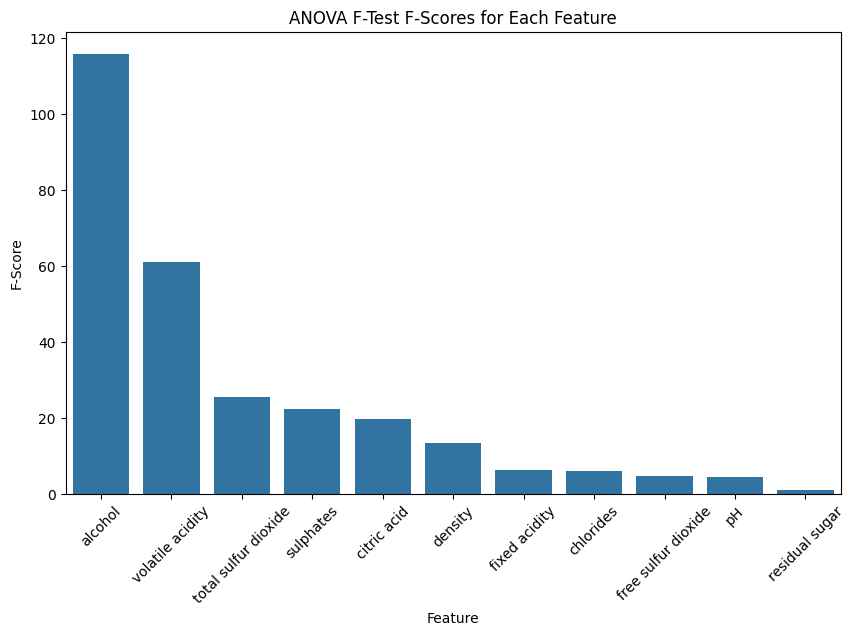

In [2]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df.drop(columns='quality')
y = df['quality']

# Perform ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Results as DataFrame
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})
anova_results = anova_results.sort_values(by='F-Score', ascending=False)

# Display ANOVA results
print(anova_results)

# Plotting the F-scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='F-Score', data=anova_results)
plt.xticks(rotation=45)
plt.title('ANOVA F-Test F-Scores for Each Feature')
plt.savefig('anova_f_scores.png')
plt.show()

##### Explanation of ANOVA F-Test
- **Concept**: ANOVA tests if there are statistically significant differences between the means of multiple groups (wine quality levels).
- **Assumptions**: Assumes normally distributed data and equal variances among groups.
- **F-Statistic**: Measures the ratio of the variance between the group means to the variance within groups, where higher values indicate a stronger relationship between the feature and target variable.

#### Information Gain
Information Gain measures the reduction in uncertainty (entropy) when knowing the value of a feature, providing insight into its relevance.

                 Feature  Information Gain
10               alcohol          0.169030
1       volatile acidity          0.141042
9              sulphates          0.118419
7                density          0.073367
6   total sulfur dioxide          0.072399
2            citric acid          0.059497
0          fixed acidity          0.056077
4              chlorides          0.042103
3         residual sugar          0.021563
5    free sulfur dioxide          0.016368
8                     pH          0.010189


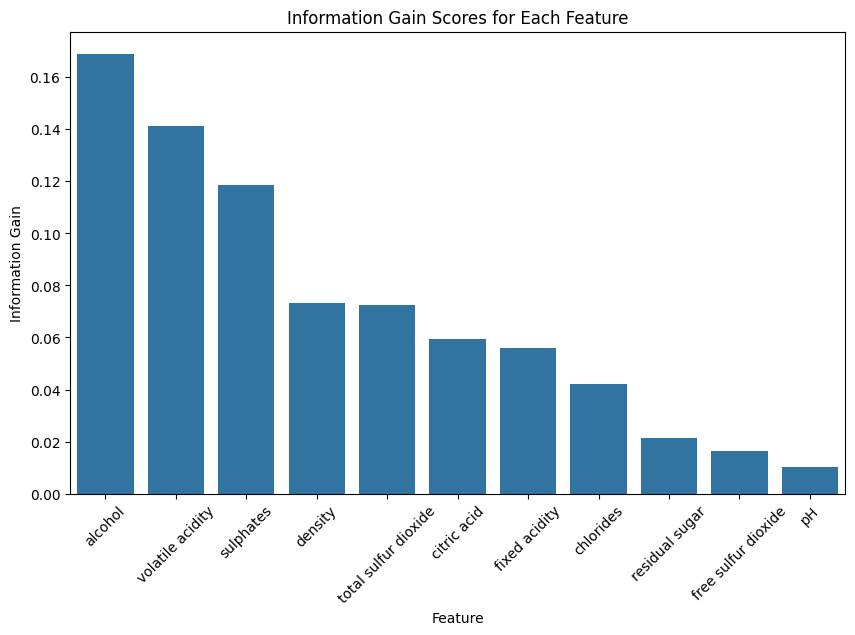

In [3]:
from sklearn.feature_selection import mutual_info_classif

# Compute Information Gain
information_gain = mutual_info_classif(X, y)

# Results as DataFrame
information_gain_results = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain})
information_gain_results = information_gain_results.sort_values(by='Information Gain', ascending=False)

# Display Information Gain results
print(information_gain_results)

# Plotting the Information Gain scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Information Gain', data=information_gain_results)
plt.xticks(rotation=45)
plt.title('Information Gain Scores for Each Feature')
plt.savefig('information_gain.png')
plt.show()

##### Explanation of Information Gain
- **Concept**: Information Gain measures the amount of information gained about the target variable by knowing the value of a feature.
- **Calculation**: Derived from the entropy reduction when a feature is known.
- **Significance**: Features with high Information Gain contribute more to reducing uncertainty in predicting the target variable.

### 3. Analysis of Results

In this section, compare the effectiveness of the selected features from Part 1 (correlation, chi-squared test, mutual information) with those from Part 2 (ANOVA F-test, information gain).

#### Example Code for Model Performance Comparison

Here’s how you could train a simple model (e.g., logistic regression or decision tree) using features selected by each method to evaluate performance metrics like accuracy, precision, and recall.

Performance with Decision Tree:
Model: Decision Tree
  Accuracy: 0.5854
  Precision: 0.5900
  Recall: 0.5854

Performance with Random Forest:
Model: Random Forest
  Accuracy: 0.6583
  Precision: 0.6301
  Recall: 0.6583

Performance with Logistic Regression:
Model: Logistic Regression
  Accuracy: 0.5542
  Precision: 0.5120
  Recall: 0.5542

Performance with Gradient Boosting:
Model: Gradient Boosting
  Accuracy: 0.6125
  Precision: 0.6006
  Recall: 0.6125

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy for Random Forest: 0.6765494875080077
Cross-validated accuracy for DecisionTreeClassifier: 0.4740

Confusion Matrix for Decision Tree:
[[  0   0   0   1   0   0]
 [  0   1   8   7   1   0]
 [  1   7 142  42   2   1]
 [  2   5  49 114  27   3]
 [  1   2   7  22  27   2]
 [  0   0   0   2   3   1]]


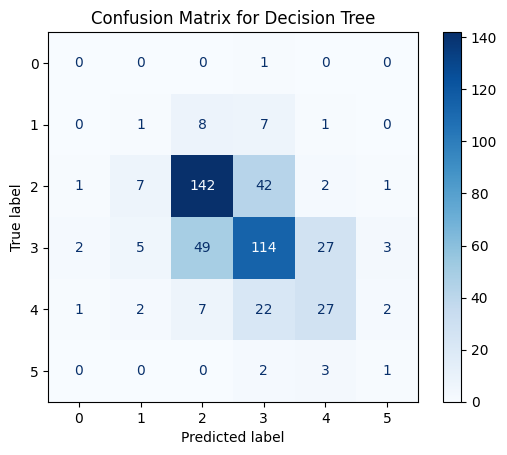

Combined Selected Features:
['alcohol' 'citric acid' 'density' 'sulphates' 'total sulfur dioxide'
 'volatile acidity']


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Combine the top features from both methods
top_n = 5  # Adjust the number of top features as needed
top_features_anova = anova_results['Feature'].head(top_n).values
top_features_info_gain = information_gain_results['Feature'].head(top_n).values

# Combine and remove duplicates
combined_features = np.unique(np.concatenate((top_features_anova, top_features_info_gain)))

# Split data into training and testing sets using combined features
X_train, X_test, y_train, y_test = train_test_split(X[combined_features], y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Helper function to train and evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}\n")

# Function to perform cross-validation
def evaluate_cross_val(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    print(f"Cross-validated accuracy for {model.__class__.__name__}: {cv_scores.mean():.4f}\n")

# Evaluate models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Gradient Boosting": GradientBoostingClassifier()
}

for model_name, model in models.items():
    print(f"Performance with {model_name}:")
    evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, model, model_name)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)
print("Best cross-validated accuracy for Random Forest:", grid_search.best_score_)

# Cross-validated accuracy for Decision Tree
evaluate_cross_val(DecisionTreeClassifier(), X[combined_features], y)

# Confusion Matrix for Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.savefig('confusion_matrix_decision_tree.png')
plt.show()

# Summary of selected features
print("Combined Selected Features:")
print(combined_features)